# TP3_a - Rede Multicamadas

Bem vindo!
Neste TP você implementará um modelo multicamadas num problema de classificação.

**Instruções:**
- Use a versão Python 3.
- Evite sempre usar usar laços `for` e `while`, fazer contas no formato vetorial é sempre mais rápido.
- Não apague os comentários que já existem nas células de código. Mas é claro que você pode adicionar outros comentários.

**Objetivos**
- Verificar a eficiência de cálculos vetoriais, ao invés de laços de repetição
- Implementar um modelo multicamadas para classificar "portas lógicas"
- Aplicar o algoritmo de gradiente descendente de forma *vetorizada*

## O Jupyter notebook

O Jupyter Notebook é um ambiente interativo de programação em uma página web. Nesse notebook você colocará o código entre os comentários `### SEU CÓDIGO COMEÇA AQUI ###` e `### FIM DO CÓDIGO ###`. Após escrever o código, você pode executar a célula com `Shift+Enter` ou no botão "Run" (com símbolo de "play") na barra de comandos acima.

Em alguns trechos será especificado "(≈ X linhas de código)" nos comentários para que você tenha uma ideia sobre o tamanho do código a ser desenvolvido naquele trecho. Lembrando que é só uma estimativa, o seu código pode ficar maior ou menor do que o especificado.

**Alguns atalhos úteis *no código*:**
- `Ctrl+Enter`: executa a célula e mantém o cursor na mesma célula
- `Shift+Enter`: executa a célula e move o cursor para a próxima célula
- `Ctrl+/`: comenta a linha de código
- `Shift+Tab`: quando o cursor estiver em uma função, mostra um HELP da função

**Alguns atalhos úteis *na célula*:**
- Cria nova célula `a`: acima, `b`: abaixo da céula selecionada
- `d` (2x): deleta célula selecionada
- `m`: define célula como texto (Markdown)
- `y`: define célula como código (Python)
- `l`: mostra numeração das linhas na célula de código
- `c`: copiar, `v`: colar, `x`: recortar célula selecionada
- `ctrl+shift+p`: mostra busca para todos comandos de célula

## Por que vetorizar o código?
No exercício abaixo você fará o mesmo cálculo de duas formas diferentes:
1. utilizando laço de repetição
1. usando cálculos matriciais

Para essa parte, considere dois vetores
- $W=[w_1 \;\;\; w_2 \;\;\; w_3 \;\;\; w_4 \;\;\; \cdots \;\;\; w_m],$
- $X=[x_1 \;\;\; x_2 \;\;\; x_3 \;\;\; x_4 \;\;\; \cdots \;\;\; x_m],$

ambos de tamanho $(1,m)$, em que se deseja calcular $v$ sendo:
- $v=w_1x_1 + w_2x_2 + w_3x_3 + w_4x_4 + \cdots + w_mx_m.$


O código já implementado abaixo realiza os cálculos de $v$ usando o laço de repetição `for` e armazena o resultado na variável `v1`. Além disso, o código mede o tempo de processamento gasto para fazer essa operação. Implemente uma forma vetorizada de calcular $v$ e armazene o resultado na variável `v2`. Como já implementado no código abaixo, meça também o tempo de execução dessa forma de calcular e mostre o tempo gasto em *ms*. O código abaixo também verifica se `v1`≈`v2`, se for exibida a mensagem *"==> ATENÇÃO, a conta que está fazendo para v2 NÃO é igual para v1. Tente novamente..."*, significa que não está fazendo a conta que deveria.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time #biblioteca para medir tempo de execução

# variáveis usadas
m = 100000 # número de elementos dos vetores
W = np.random.rand(m)
X = np.random.rand(m)
v1 = 0 #cálculo de v usando laço de repetição
v2 = 0 #cálculo de v usando operação vetorial


tic = time.time() # <=== INÍCIO da contagem de tempo

# Implementação 1: usando laço FOR
v1 = 0 # incializa para acumular valores
for k in range(m):
    v1 = v1 + W[k]*X[k] #multiplicação ponto a ponto

tac = time.time() # <=== FIM da contagem de tempo
print('1) Tempo usando laço de repetição: ' + str(1000*(tac-tic)) + 'ms')


### SEU CÓDIGO COMEÇA AQUI ### (≈4 linhas de código)


### FIM DO CÓDIGO ###


# verifica se v1≈v2
if int(v2)==int(v1): print('\n ==> OK, a variável v1 é aproximadamente igual a v2!')
else: print('\n ==> ATENÇÃO, a conta que está fazendo para v2 NÃO é igual para v1. Tente novamente...')

**Saída esperada** *(os valores abaixo podem alterar de acordo com o hardware utilizado!)*

`1) Tempo usando laço de repetição: 115.69094657897949ms`

`2) Tempo usando vetorização: 0.9982585906982422ms`

` ==> OK, a variável v1 é aproximadamente igual a v2!`
___

## Problema do XOR: gerando dados

O código abaixo gera um conjunto de dados com 100 amostras, $m=100$, de um problema de classificação.

1. Rode o código abaixo e observe que as classes não são linearmente separáveis
1. Observe também que os dados de entrada estão organizados numa única matriz X_tr

Obs.: essa parte é só rodar o código abaixo, não precisa escrever nada na célula abaixo.

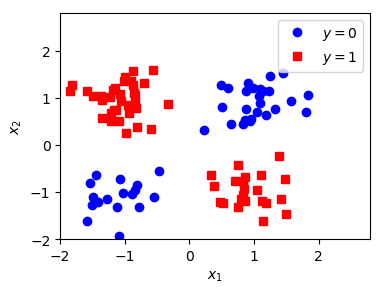

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# dados de treinamento
m = 100
X_tr = np.random.randint(2, size=(2,m))
Y_tr = np.logical_xor(X_tr[0,:], X_tr[1,:]).astype(int)*2-1
X_tr = X_tr*2-1 + np.random.normal(0, .3, (2,m)) # adicionando ruído

plt.figure(figsize=(4,3), dpi=100)
plt.plot(X_tr[0, Y_tr<0], X_tr[1, Y_tr<0], 'o', c='blue')
plt.plot(X_tr[0, Y_tr>0], X_tr[1, Y_tr>0], 's', c='red')

plt.legend(('$y=0$','$y=1$'))
plt.xlim((-2, 2.8))
plt.ylim((-2, 2.8))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

___

## Perceptron de multicamadas (MLP)

Nessa parte você implementará um modelo *multicamadas* usando a função de ativação sigmóide (mesma utilizada anteriormente).

1. A arquitetura da rede neural a ser implementada é
   + $L$, número de camadas da rede: 2
   + $n^{[0]}$, número de entradas: 2
   + $n^{[1]}$, número de nós na camada escondida: 2
   + $n^{[2]}$, número de saídas: 1
   + $\sigma(v)$, função de ativação: $\sigma(v)=1/(1+e^{-v})$

Para facilitar nas contas, crie uma função `sigmoide(v)` que implementa $\sigma(v)$. Opcionalmente, você pode criar também uma função `neuronio(X, W, b)` para implementar o neurônio, contudo, o cálculo da saída `Y` **deve** ser feito de forma vetorial, considerando a *matriz* `X` e o *vetor* `W` de dimensões apropriadas. Note que a saída `Y` é também um *vetor*.

Implemente abaixo como você calcularia o vetor `Y_aux` para a matriz `X_aux`, vetor `W_aux`, escalar `b_aux` mostrados abaixo. Ao final, mostre o resultado de `Y_aux`.

In [120]:
# entrada e pesos de teste
X_aux = np.array([[1, -2, 3, -4, 5, -6],[-7, 8, -9, 10, -11, 12]])
W_aux = np.array([[-.2], [.1]])
b_aux = .2


### SEU CÓDIGO COMEÇA AQUI ###


### FIM DO CÓDIGO ###   

**Saída esperada**

`Y_aux = [[ 0.33181223  0.80218389  0.21416502  0.88079708  0.13010847  0.93086158]]`
___

## Treinamento do modelo logístico

**Sugestão**. Para aferir que a sua versão vetorizada do treinamento funciona, implemente o algoritmo vetorizado no problema do TP2 e compare com seus resultados da implementação não vetorizada.


Nessa parte do trabalho você deve implementar o algoritmo de treinamento do modelo para o problema de classificação XOR. Implemente o código de aprendizado do gradiente descendente de forma ***vetorizada*** (obrigatoriamente).

**Sugestão**. Para aferir que a sua versão vetorizada do treinamento funciona, implemente o algoritmo vetorizado no problema do TP2 e compare com seus resultados da implementação não vetorizada.

Durante o treinamento, você deve calcular a função custo $J(W, b)$ para cada época. Ao final do treinamento, você deve mostrar um gráfico de $J(W, b)$ pelo número de épocas de treinamento.

Como feito anteriormente, você deve gerar 50 amostras de validação (copie a forma de gerar dados da primeira parte). Com esses dados de validação, calcule $J_{val}(W, b)$. Lembre-se: o valor de $J_{val}(W, b)$ é uma estimativa do erro de *generalização*. Imprima o valor de $J_{val}(W, b)$.

Ao final da implementação, espera-se as informações ao final do código abaixo:
1. Para o modelo treinado, exiba o valor de $J(W, b)$ (treinamento) e também o valor de $J_{val}(W, b)$ calculado nos dados de validação;
1. Valor da função custo $J(W, b)$ (treinamento) pelo número de épocas de treinamento;
1. Para os dados de ***validação***, faça um gráfico com os valores das entradas (como na parte "gerando dados" desse TP) e, por meio de símbolos e cores, registre quais pontos foram classificados corretamente (ex. colocar um círculo verde, usando 'og' no plot) e quais não foram classificados corretamente pelo modelo (ex. colocar um xis preto, usando 'xk' no plot). Para classificar, considere $y^{(i)}>0,5$ da classe "1" e considere $y^{(i)}<0,5$ da classe "0".

In [ ]:
### SEU CÓDIGO COMEÇA AQUI ###

### FIM DO CÓDIGO ###

**Saída esperada**:
- Informação: informar o valor da função custo $J$ para os dados de treinamento e de $J_{val}$ para os dados de validação
- Gráfico 1: valor da função custo $J$ para cada época. O gráfico de ter no *eixo horizontal*: número da "época"; e no *eixo vertical*: valor da função custo calculada nos dados de treinamento.
- Gráfico 2: gráfico das entradas, similar ao da primeira parte desta atividade, para os dados de **validação**, mostrando para cada entrada se aquele ponto foi classificado corretamente ou não, através de diferentes símbolos para cada caso.
___

## Desafio! (opcional, você não perderá nenhum ponto se deixar de fazer essa parte)

Se este trabalho foi fácil para você até aqui, você pode tentar um novo desafio: utilizar o algoritmo de aprendizado implementado nos dados da Iris. Esses dados podem ser obtidos no site https://archive.ics.uci.edu/ml/datasets/Iris, que contém também uma descrição mais completa do problema.

Implemente o algoritmo de aprendizado fazendo os ajustes necessários. Ao final, mostre o ressultado do algoritmo de aprendizado para os **dados de validação**. Não se esqueça de segregar o conjunto de dados em: treinamento (~80%) e validação (~20%). Mostre o percentual de acerto nesses dados.

Note que são **3 espécies** (Setosa, Versicolour, Virginica) diferentes de Íris. A Íris Setosa é linearmente separável das demais, portanto, é possível distingui-la com um neurônio apenas. Contudo, a rede MLP permite distinguir as espécies *Íris Versicolour* e *Íris Virginica* mesmo *não sendo linearmente separáveis* (veja imagem abaixo).

<p><a href="https://commons.wikimedia.org/wiki/File:Iris_dataset_scatterplot.svg#/media/File:Iris_dataset_scatterplot.svg"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Iris_dataset_scatterplot.svg/1200px-Iris_dataset_scatterplot.svg.png" alt="Iris dataset scatterplot.svg"></a><br>By <a href="//commons.wikimedia.org/wiki/User:Nicoguaro" title="User:Nicoguaro">Nicoguaro</a> - <span class="int-own-work" lang="en">Own work</span>, <a href="https://creativecommons.org/licenses/by/4.0" title="Creative Commons Attribution 4.0">CC BY 4.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=46257808">Link</a></p>


Assim, implemente sua rede neural para distinguir as espécies *Íris Versicolour* e *Íris Virginica*. Ignore os dados da Íris Setosa.

Bom trabalho!

In [ ]:
### SEU CÓDIGO COMEÇA AQUI ###

### FIM DO CÓDIGO ###

**Saída esperada**:
- Índice de acerto nos dados de validação.
- Gráfico de função custo vs épocas de treinamento
- Outras informações relevantes
___



# Conclusões

Escreva aqui, em linguagem `markdown`, suas considerações sobre o que foi aprendido nesse trabalho prático.

*### escreva aqui ###*